In [33]:
%matplotlib inline 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp

# Random model and control datasets

## Three analyses:  
1. Randomized Expression: 
        a. Randomize all expression values for mRNA
        b. Calculate fold changes
        c. Shuffle protein fold changes for absolute spectra matches
        d. Identify genes with > 2 fold change in 75% of samples
        e. Match patient mRNA and protein mean 
        f. Identify dysregulation pattern for genes
2. Randomized median fold-changes:
        a-d Done with standard data.
        e. Shuffle mRNA and protein mean fold chnages
        f. Identified dysregulation patterns for genes
3. Calculate Pearson Correlation Coefficient for genes and the proteins

### Criteria for dysregulation classification:
* low_prot_high_mrna <- mrna > 4 & prot < -1)
* low_prot_low_mrna <-mrna < -1 & rot < -1)
* higher_prot_low_mrna<-mrna < -1 & prot > 0.5)
* higher_prot_high_mrna<-mrna > 2 & prot > 0.5)



## Results

#### Randomized Expression genes:
Only two : 

In [14]:
cat ../../bioinfo/qual-project/tcga/exp_rand_results/higher_prot_high_mrna.txt

VPS33A


In [15]:
cat ../../bioinfo/qual-project/tcga/exp_rand_results/higher_prot_low_mrna.txt

MRPS9


#### Randomized median fold-changes

In [16]:
cat ../../bioinfo/qual-project/tcga/dys_rand_results/higher_prot_high_mrna.txt

EPM2A
MGP
SPAG9
UBE2D2
UBE2R2


In [17]:
cat ../../bioinfo/qual-project/tcga/dys_rand_results/higher_prot_low_mrna.txt

PIGA


In [18]:
cat ../../bioinfo/qual-project/tcga/dys_rand_results/low_prot_high_mrna.txt

In [19]:
cat ../../bioinfo/qual-project/tcga/dys_rand_results/low_prot_low_mrna.txt

HMGCL
NT5DC1
SH2D3A
ZMAT4


### mRNA fold changes before randomization

(array([  2.00000000e+01,   5.47000000e+02,   7.30900000e+03,
          9.32250000e+04,   1.89369600e+06,   3.19488000e+05,
          2.41560000e+04,   1.93500000e+03,   1.48000000e+02,
          1.00000000e+01]),
 array([-18.45930641, -14.46831676, -10.4773271 ,  -6.48633744,
         -2.49534779,   1.49564187,   5.48663153,   9.47762119,
         13.46861084,  17.4596005 ,  21.45059016]),
 <a list of 10 Patch objects>)

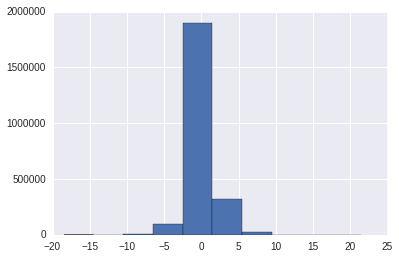

In [31]:
mrna = pd.read_csv(open("../../bioinfo/qual-project/tcga/patient_log_ratio_dys_counts.txt",'r'),delimiter="\t")
mrna.drop('majority_dys',1)
mrna = pd.melt(mrna,id_vars='gene_id',var_name='sample')
plt.hist(mrna['value'])

### mRNA fold changes after randomization

In [17]:
rand_mrna = pd.read_csv(open("../../bioinfo/qual-project/tcga/data/rand_mrna_fold_change.txt",'r'),delimiter="\t")
rand_mrna = pd.melt(rand_mrna,id_vars='gene_id',var_name='sample')

(array([  4.93000000e+02,   3.19700000e+04,   2.43041000e+05,
          3.08927000e+05,   6.35593000e+05,   5.36082000e+05,
          3.11052000e+05,   2.33048000e+05,   1.95290000e+04,
          2.68000000e+02]),
 array([-19.69934223, -15.69085945, -11.68237666,  -7.67389387,
         -3.66541109,   0.3430717 ,   4.35155448,   8.36003727,
         12.36852005,  16.37700284,  20.38548562]),
 <a list of 10 Patch objects>)

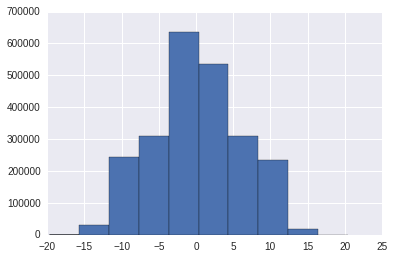

In [20]:
plt.hist(rand_mrna['value'])

#### K-S test

In [34]:
ks_2samp(rand_mrna['value'], mrna['value'])

(0.27690236425964693, 0.0)

#### Pearson correlation coefficient between mRNA and Protein fold changes

(array([  163.,   887.,  1414.,  1567.,  1361.,  1063.,   650.,   289.,
          105.,    36.]),
 array([-0.96431141, -0.80397204, -0.64363268, -0.48329332, -0.32295396,
        -0.16261459, -0.00227523,  0.15806413,  0.31840349,  0.47874286,
         0.63908222]),
 <a list of 10 Patch objects>)

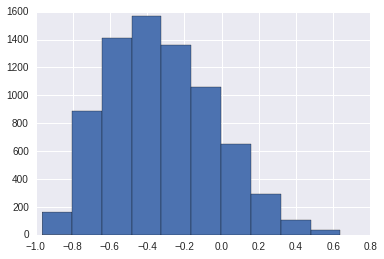

In [19]:


a = pd.read_csv(open("../../bioinfo/qual-project/tcga/old_data/log_ratio_mrna_prot_pearson.txt"),delimiter="\t")
plt.hist(sorted(a['pearson_corr'].dropna()))


#### Quantiles

In [51]:


np.percentile(a['pearson_corr'].dropna(),50)

-0.34868750431199996

#### Genes with > 0.6 Pearson Correlation Coefficient

In [60]:
genes = a[['gene','pearson_corr']][a['pearson_corr'] > 0.6]
new_gene_list = list(genes['gene'])
print genes

          gene  pearson_corr
2866        F2      0.621470
5369      MYH6      0.600125
5914     OSTM1      0.639082
6593  PPP1R16A      0.627921

[4 rows x 2 columns]


#### Genes with <  -0.9 Pearson Correlation Coefficient

In [61]:
genes = a[['gene','pearson_corr']][a['pearson_corr'] < -0.9]
new_gene_list = new_gene_list + list(genes['gene'])
print genes

         gene  pearson_corr
432     ANXA6     -0.911485
3747   HEATR6     -0.964311
4045  IGF2BP2     -0.906013
5730     NQO1     -0.926640
5788   NUDCD1     -0.902085
5804    NUDT4     -0.934351
6340  PLA2G4A     -0.902639
6347     PLAT     -0.916102
6360    PLCG1     -0.917500
6472    POLD3     -0.910324
6578    PPME1     -0.905212
7455  RPS6KB1     -0.921876
7545  S100A7A     -0.907647
8226    SPG20     -0.925588
8772     TLE3     -0.902558
9283    UBE2Z     -0.921773

[16 rows x 2 columns]


#### Previously detected dysregulated genes:

In [64]:
with open("../../bioinfo/qual-project/tcga/old_data/genes_of_interest.txt",'r') as f:
    old_genes = f.read().splitlines()
print '\n'.join(old_genes)

COX7A1
LOXL4
PTGDS
SAA1
C15orf48
E2F5
GLRX2
IL18
LY6E
SPC25
FABP7
HMGCS2
MUCL1
PIP
ACTL8
CAMP
CASP14
CLEC3A
CRIP1
HMGA1
KLRG2
MUC2
S100A7
S100A7A


#### Only overlapping gene

In [66]:
print '\n'.join(list(set(new_gene_list) & set(old_genes)))

S100A7A


In [69]:
pearson_corrs = a[a['gene'].isin(old_genes)]
print pearson_corrs

          gene  pearson_corr dys_type    in_cosmic
127      ACTL8     -0.626226  neither   not_cosmic
1019  C15orf48     -0.576375  neither   not_cosmic
1220      CAMP     -0.131358     mrna   not_cosmic
1265    CASP14     -0.849156     prot   not_cosmic
1722    CLEC3A     -0.638207     mrna   not_cosmic
1900    COX7A1     -0.257154     mrna   not_cosmic
1959     CRIP1     -0.724489     mrna   not_cosmic
2535      E2F5     -0.311081  neither   not_cosmic
2880     FABP7     -0.540688     mrna   not_cosmic
3429     GLRX2     -0.560133  neither   not_cosmic
3842     HMGA1      0.022958  neither  cosmic_gene
3850    HMGCS2     -0.325150     mrna   not_cosmic
4075      IL18     -0.522575  neither   not_cosmic
4454     KLRG2      0.363881  neither   not_cosmic
4654     LOXL4     -0.337552     mrna   not_cosmic
4746      LY6E     -0.650485  neither   not_cosmic
5332      MUC2     -0.612412     prot   not_cosmic
5337     MUCL1     -0.299820     mrna   not_cosmic
6306       PIP     -0.012468   